<a href="https://colab.research.google.com/github/ldaniel/Megalotropia/blob/master/notebooks/Megalotropia-WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Megalotropia Word Count Analysis


## Step 1 - Configuration

### Loading required basic packages

In [0]:
import numpy as np
import pandas as pd

### Defining imports from packages

In [0]:
from os import path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

## Step 2 - Setting up Google Drive Authentication

### Method 1 - Getting from Google Drive

#### Getting credentials from Google Drive

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#### Downloading file from Google Drive to Colab and reading the data

Before run this step, it's necessary to get the file ID from the shareable link obtained in Google Drive.

Alternatively, the file ID can be also obtained from the link. The file ID is alphanumeric characters between /d/ and /view?usp=sharing. For instance, let’s assume the shareable like to the file we want to import is as bellow.

https://drive.google.com/open?id=1hO2Xvna8X--LCRDei4iYGtBetzH8lxet

In [0]:
downloaded = drive.CreateFile({'id':"1hO2Xvna8X--LCRDei4iYGtBetzH8lxet"})
downloaded.GetContentFile('megalotropia-experiences.txt')

downloaded = drive.CreateFile({'id':"1UP2OTvUK2E7foR59B1Wx5TMKBNnKGrfZ"})
downloaded.GetContentFile('megalotropia-m.png')

file_text = open('megalotropia-experiences.txt')
text = file_text.read()
file_text.close()

### Method 2 - Getting from Github

#### Downloading file from Github and reading the data

In [16]:
!apt-cache search urllib

import urllib

with urllib.request.urlopen('https://raw.githubusercontent.com/ldaniel/Megalotropia/master/data/raw/megalotropia-experiences.txt') as response:
   text = str(response.read(), 'utf-8')

python-urllib3 - HTTP library with thread-safe connection pooling for Python
python3-urllib3 - HTTP library with thread-safe connection pooling for Python3
python-keepalive - urllib keepalive support for Python 2
python-multipartposthandler - handler for urllib2 to enable multipart form uploading
python-ndg-httpsclient - enhanced HTTPS support for httplib and urllib2 using PyOpenSSL for Python2
python3-keepalive - urllib keepalive support for Python 3
python3-ndg-httpsclient - enhanced HTTPS support for httplib and urllib2 using PyOpenSSL for Python3


str

## Step 3 - Removing stop words

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

tokenized_text = nltk.word_tokenize(text)
stop_words = set(stopwords.words('portuguese')) 
filtered_text = [w for w in tokenized_text if not w in stop_words] 
final_text = ' '.join([str(elem) for elem in filtered_text]) 

# checking the outputs
print(stop_words)
print(tokenized_text)
print(filtered_text)
print(final_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'não', 'seríamos', 'serei', 'nossos', 'nossa', 'na', 'terei', 'ele', 'sua', 'tivessem', 'deles', 'esta', 'estavam', 'tiverem', 'suas', 'os', 'nossas', 'até', 'nosso', 'era', 'houverem', 'seu', 'quando', 'de', 'te', 'houvessem', 'houver', 'houveram', 'for', 'tivéramos', 'aquela', 'teve', 'do', 'meus', 'terá', 'este', 'o', 'essas', 'essa', 'houveríamos', 'dos', 'fôramos', 'tivesse', 'teríamos', 'tivera', 'hajamos', 'lhes', 'tinham', 'tenho', 'com', 'há', 'são', 'é', 'seus', 'houvesse', 'como', 'seja', 'estiver', 'eram', 'somos', 'eles', 'estivermos', 'hei', 'houveria', 'e', 'haja', 'isso', 'depois', 'fôssemos', 'houvermos', 'estejam', 'terão', 'por', 'teria', 'tenhamos', 'estivéramos', 'tínhamos', 'ou', 'estejamos', 'das', 'tem', 'pelo', 'sejam', 'esse', 'pelos

## Step 4 - Creating the word cloud

### Regular word cloud

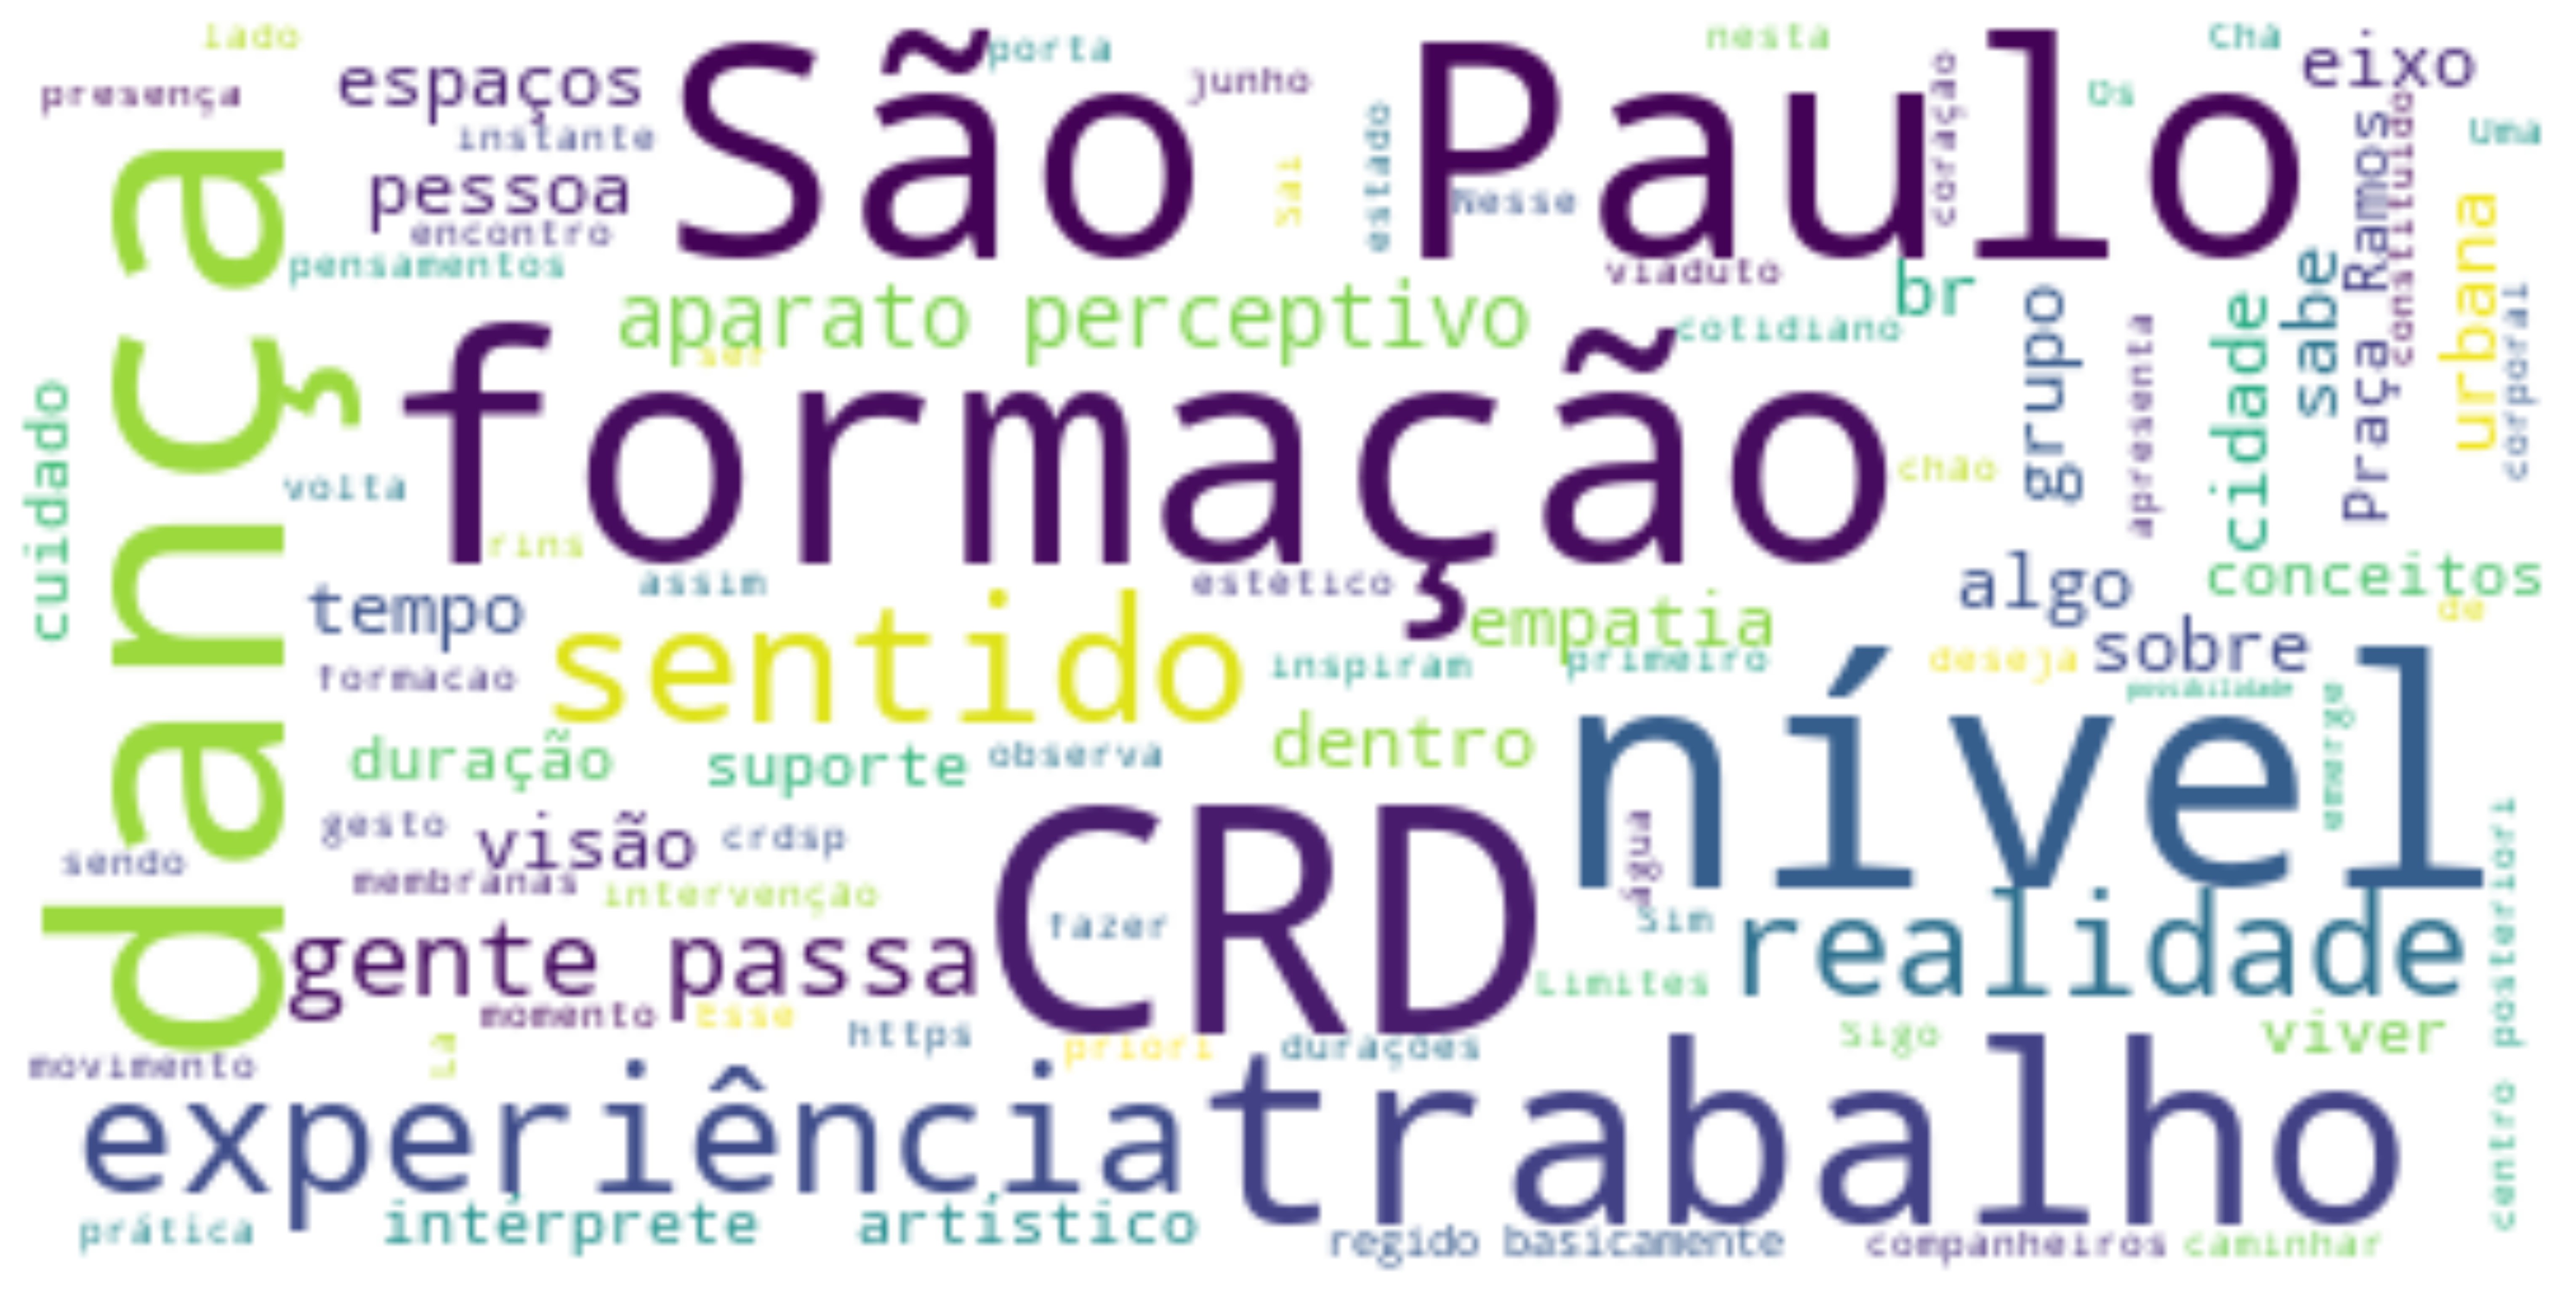

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# create and generate a word cloud image
wordcloud = WordCloud(max_font_size = 50, 
                      max_words = 200, 
                      background_color = "white")
wordcloud.generate(final_text)

# display the generated image
plt.figure(figsize = [20, 10], dpi = 400)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Using mask

In [0]:
megalotropia_mask = np.array(Image.open("megalotropia-m.png"))

# create and generate a word cloud image
wordcloud = WordCloud(background_color = "white", 
               max_words = 500, 
               mask = megalotropia_mask, 
               contour_width = 0, 
               contour_color = 'indigo')
wordcloud.generate(final_text)

# display the generated image
plt.figure(figsize = [20, 10], dpi = 600)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## References

- https://www.datacamp.com/community/tutorials/wordcloud-python